In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
df = pd.read_csv('full_data.csv')

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [379]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [380]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [381]:
df.duplicated().sum()

0

## Checking the data is balanced or not?

In [382]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

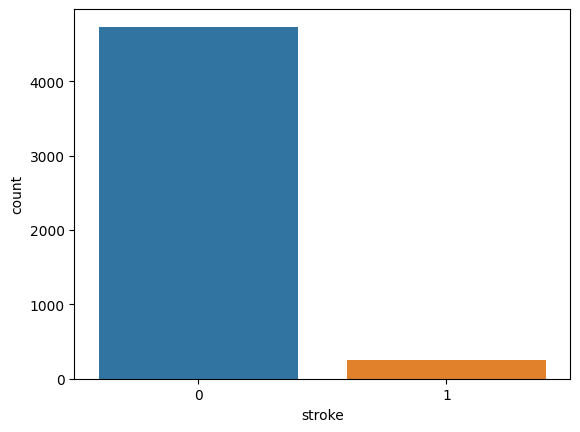

In [383]:
sns.countplot(x="stroke",data=df)

## Using Resample of Scikit-Learn Utils

In [384]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['stroke']==0)] 
df_minority = df[(df['stroke']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4733, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [385]:
df_upsampled['stroke'].value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [386]:
df_upsampled.reset_index(inplace=True)

In [387]:
data=df_upsampled.copy()

<Axes: xlabel='stroke', ylabel='count'>

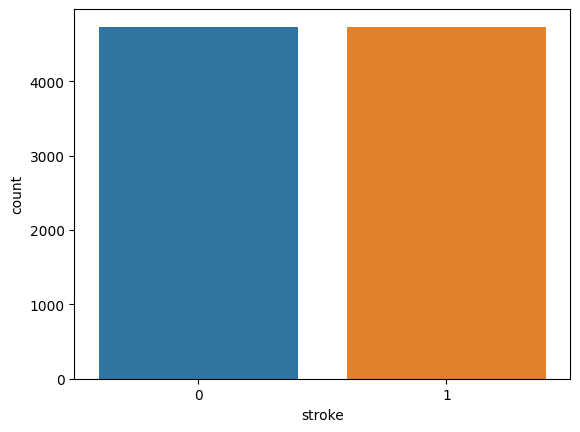

In [388]:
sns.countplot(x='stroke',data=data)

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9466 non-null   int64  
 1   gender             9466 non-null   object 
 2   age                9466 non-null   float64
 3   hypertension       9466 non-null   int64  
 4   heart_disease      9466 non-null   int64  
 5   ever_married       9466 non-null   object 
 6   work_type          9466 non-null   object 
 7   Residence_type     9466 non-null   object 
 8   avg_glucose_level  9466 non-null   float64
 9   bmi                9466 non-null   float64
 10  smoking_status     9466 non-null   object 
 11  stroke             9466 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 887.6+ KB


In [390]:
data.drop('index',axis=1,inplace=True)

## Univariate Analysis

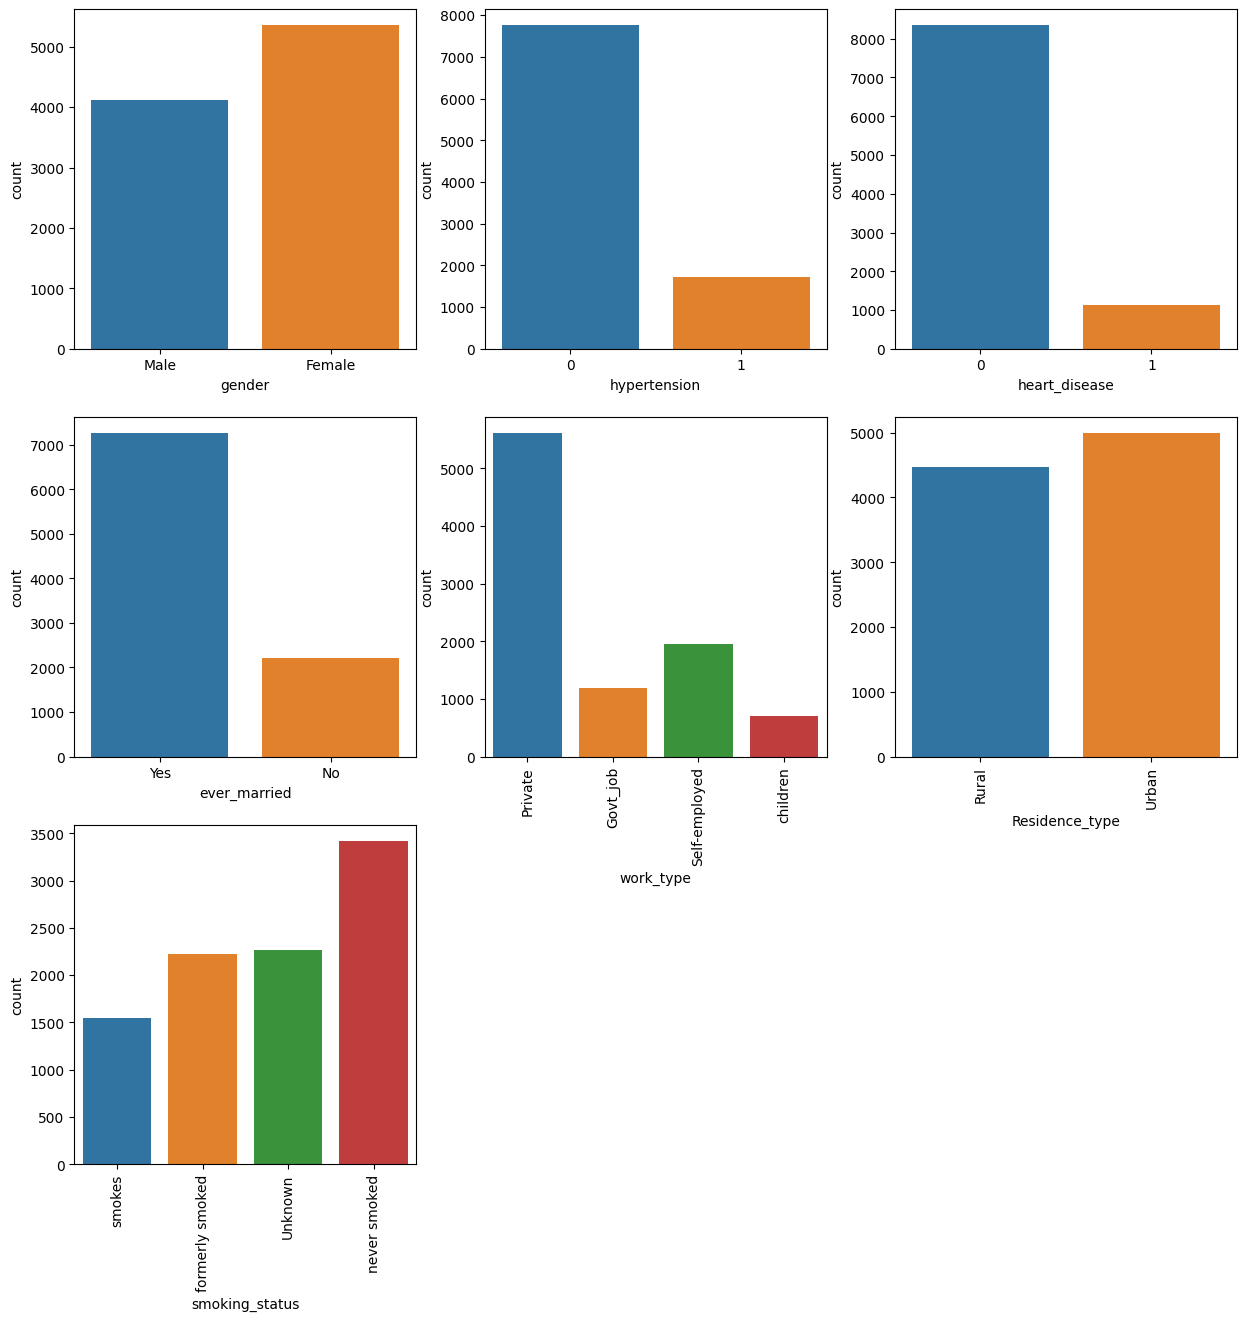

In [391]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.countplot(x='gender',data=data)

plt.subplot(3,3,2)
sns.countplot(x='hypertension',data=data)

plt.subplot(3,3,3)
sns.countplot(x='heart_disease',data=data)

plt.subplot(3,3,4)
sns.countplot(x='ever_married',data=data)

plt.subplot(3,3,5)
sns.countplot(x='work_type',data=data)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x='Residence_type',data=data)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.countplot(x='smoking_status',data=data)
plt.xticks(rotation=90)

plt.show()

## Insights
1. The datasets contains most of the people who don't have hypertension and heart disease
2. The datasets conatins the people who smokes, formerly smoked and never smoked
3. Most of the people are from private sectors and married.
4. The people from urban and rural are balanced

<Axes: xlabel='bmi', ylabel='Count'>

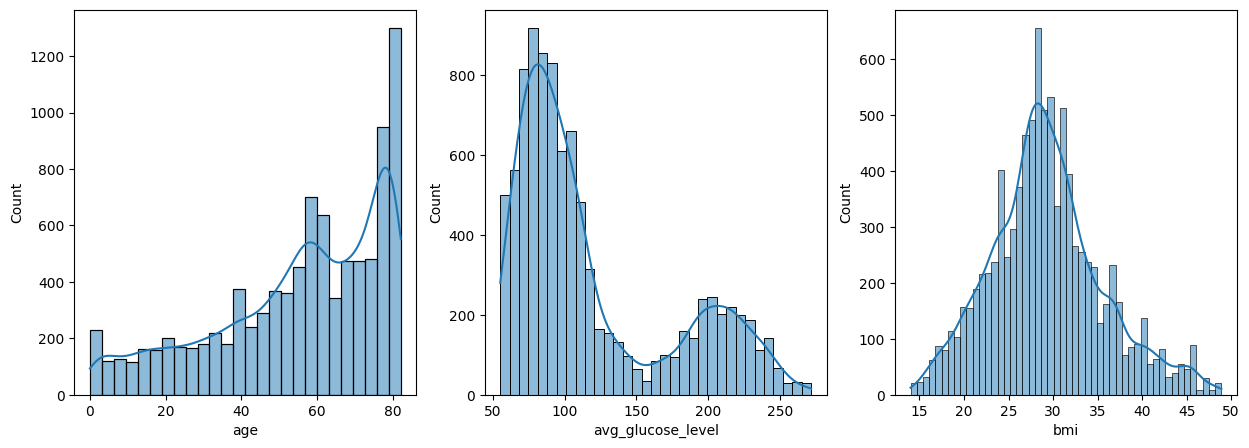

In [392]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(data['age'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['avg_glucose_level'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['bmi'],kde=True)

<li>BMI has a normal distribution</li>
<li>Age has a left skewed data</li>
<li>Avg_glucose_level has almost right skewed data</li>

# Bivariate Analysis

<Axes: xlabel='stroke', ylabel='bmi'>

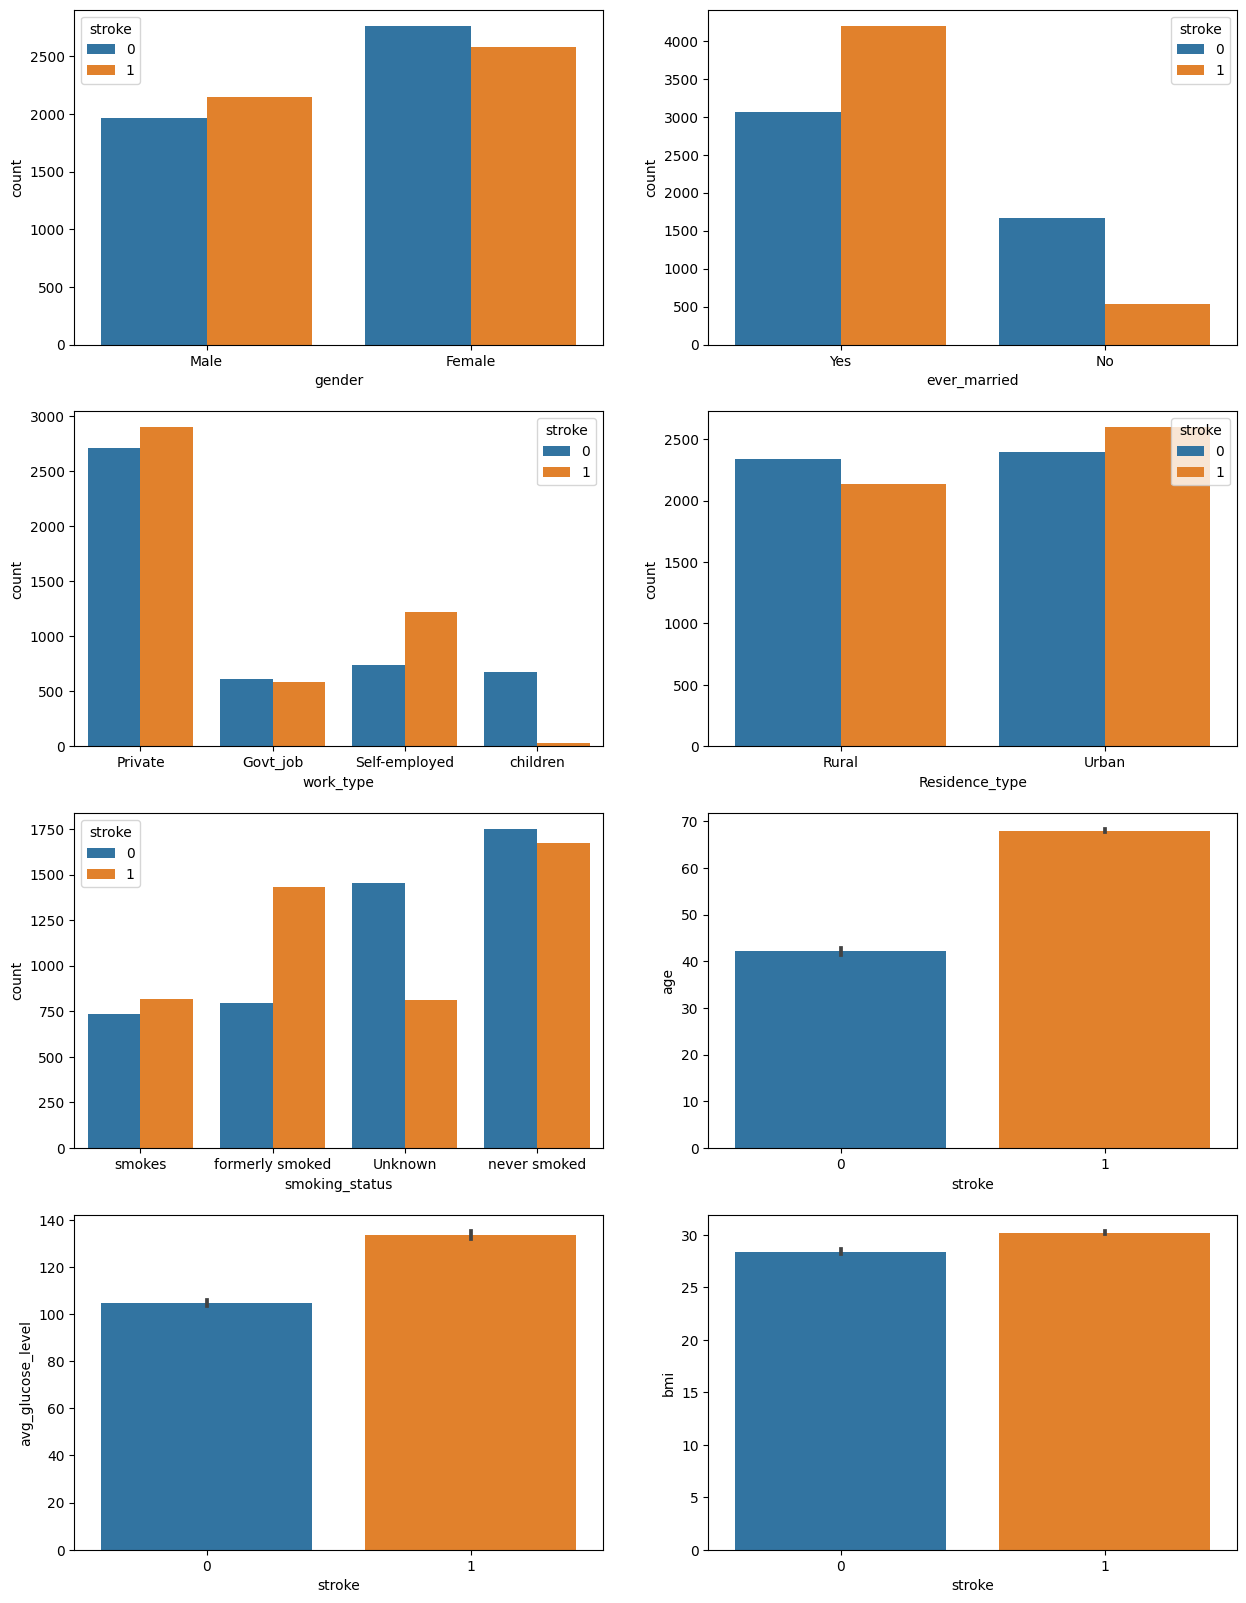

In [393]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='gender',hue='stroke',data=data)

plt.subplot(4,2,2)
sns.countplot(x='ever_married',hue='stroke',data=data)

plt.subplot(4,2,3)
sns.countplot(x='work_type',hue='stroke',data=data)

plt.subplot(4,2,4)
sns.countplot(x='Residence_type',hue='stroke',data=data)

plt.subplot(4,2,5)
sns.countplot(x='smoking_status',hue='stroke',data=data)

plt.subplot(4,2,6)
sns.barplot(x='stroke',y='age', data=data)

plt.subplot(4,2,7)
sns.barplot(x='stroke',y='avg_glucose_level', data=data)

plt.subplot(4,2,8)
sns.barplot(x='stroke',y='bmi', data=data)

## Insights
1. The people who are ever married has a more chance to get brain stroke
2. The aged people are also prone to brain stroke
3. Smoking dosen't have any effect on having a brain stroke
4. Urban people have high chance of having brain stroke
5. Average glucose level should be moderate for not having a brain stroke

## Correlation

In [394]:
data.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_25876\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.281352,0.264377,0.279848,0.240069,0.580368
hypertension,0.281352,1.000000,0.084671,0.175769,0.132522,0.243394
heart_disease,0.264377,0.084671,1.000000,0.257233,0.078363,0.217909
avg_glucose_level,0.279848,0.175769,0.257233,1.000000,0.274392,0.261475
bmi,0.240069,0.132522,0.078363,0.274392,1.000000,0.141467
stroke,0.580368,0.243394,0.217909,0.261475,0.141467,1.000000


In [395]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000
mean,55.059417,0.180963,0.118635,119.076075,29.304099,0.500000
std,22.259574,0.385008,0.323376,55.484490,6.322679,0.500026
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,41.000000,0.000000,0.000000,78.180000,25.300000,0.000000
50%,59.000000,0.000000,0.000000,97.370000,28.800000,0.500000
75%,75.000000,0.000000,0.000000,149.165000,32.700000,1.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Handling Outliers

<Axes: >

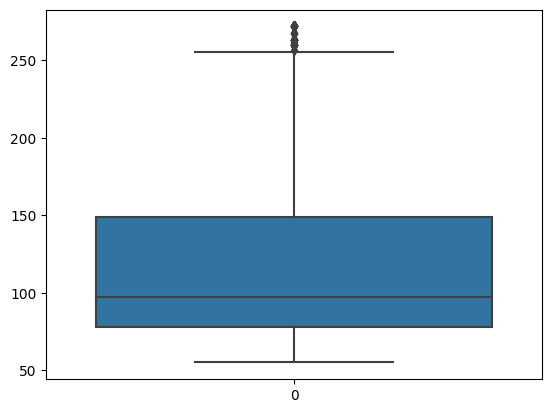

In [396]:
sns.boxplot(data['avg_glucose_level'])

In [397]:
q1=np.quantile(data['avg_glucose_level'],0.25)
q3=np.quantile(data['avg_glucose_level'],0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [398]:
lower,upper

(-28.29749999999997, 255.64249999999998)

In [399]:
len(data) - len(data[(data['avg_glucose_level']>=lower) & (data['avg_glucose_level']<=upper)])

62

In [400]:
data = data[(data['avg_glucose_level']>=lower) & (data['avg_glucose_level']<=upper)]

In [401]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

<Axes: >

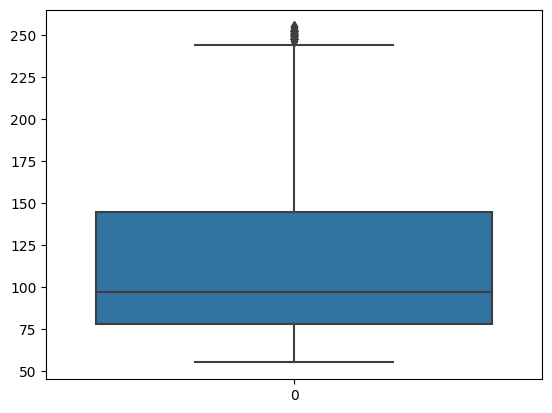

In [402]:
sns.boxplot(data['avg_glucose_level'])

In [403]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,55.0,1,1,Yes,Private,Urban,210.40,40.0,smokes,1
1,Male,79.0,0,1,Yes,Private,Rural,129.98,22.6,formerly smoked,1
2,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
3,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
4,Male,47.0,0,0,Yes,Private,Urban,86.94,41.1,formerly smoked,1


## Feature Engineering

In [442]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.drop('stroke',axis=1),data['stroke'],test_size=0.2,random_state=42)

In [443]:
cat_cols=['gender','ever_married','work_type','Residence_type','smoking_status']
num_cols=['age','avg_glucose_level','bmi']

In [444]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [447]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
encoder = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore',dtype='int')

In [451]:
trf = ColumnTransformer([
    ('encoder',OneHotEncoder(sparse=False,dtype=int,handle_unknown='ignore',drop='first'),[0,4,5,6,9]),
    ('scaler',MinMaxScaler(),[1,7,8])
],remainder='passthrough')

## pickle the transformer here
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

import pickle
pickle.dump(trf,open("preprocessing.pkl", "wb"))

rfc = RandomForestClassifier(criterion='gini', max_depth=16, max_features='log2', n_estimators= 200)
rfc.fit(X_train,y_train)
pickle.dump(rfc,open('model.pkl','wb'))

y_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_rfc),recall_score(y_test,y_rfc)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(0.89792663476874, 0.9154013015184381)

In [408]:
encoder.fit(X_train[cat_cols])

OneHotEncoder(drop='first', dtype='int', handle_unknown='ignore',
              sparse_output=False)

In [409]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_cols])

In [410]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [411]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7523 entries, 4141 to 7270
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          7523 non-null   object 
 1   age                             7523 non-null   float64
 2   hypertension                    7523 non-null   int64  
 3   heart_disease                   7523 non-null   int64  
 4   ever_married                    7523 non-null   object 
 5   work_type                       7523 non-null   object 
 6   Residence_type                  7523 non-null   object 
 7   avg_glucose_level               7523 non-null   float64
 8   bmi                             7523 non-null   float64
 9   smoking_status                  7523 non-null   object 
 10  gender_Male                     7523 non-null   int32  
 11  ever_married_Yes                7523 non-null   int32  
 12  work_type_Private              

In [412]:
X_train.drop(columns=cat_cols,axis=1,inplace=True)
X_test.drop(columns=cat_cols,axis=1,inplace=True)

In [432]:
new=data.drop('stroke',axis=1)

In [433]:
new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,55.0,1,1,Yes,Private,Urban,210.40,40.0,smokes
1,Male,79.0,0,1,Yes,Private,Rural,129.98,22.6,formerly smoked
2,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes
3,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked
4,Male,47.0,0,0,Yes,Private,Urban,86.94,41.1,formerly smoked


In [417]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [418]:
m0 = LogisticRegression()
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()

In [419]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4141,0.963379,0,0,0.189603,0.292264,0,1,1,0,0,0,0,1,0
1219,0.829102,1,0,0.123319,0.449857,0,0,0,1,0,1,0,1,0
8795,0.511719,0,0,0.169358,0.638968,1,1,1,0,0,1,1,0,0
5465,0.755859,0,0,0.182604,0.472779,0,1,1,0,0,0,0,1,0
4961,0.182129,0,0,0.359110,0.421203,0,0,0,0,1,1,0,0,0


In [420]:
m0.fit(X_train,y_train)
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)

RandomForestClassifier()

In [421]:
y0 = m0.predict(X_test)
y1 = m1.predict(X_test)
y2 = m2.predict(X_test)

In [422]:
print("Logistic Regression Acc | Pre | Rec : ", accuracy_score(y_test,y0),precision_score(y_test,y0),recall_score(y_test,y0))
print("Confusion Matrix")
print(confusion_matrix(y_test,y0))
print("Decesion Tree Acc | Pre | Rec : ", accuracy_score(y_test,y1),precision_score(y_test,y1),recall_score(y_test,y1))
print("Confusion Matrix")
print(confusion_matrix(y_test,y1))
print("Random Forest Acc | Pre | Rec : ", accuracy_score(y_test,y2),precision_score(y_test,y2),recall_score(y_test,y2))
print("Confusion Matrix")
print(confusion_matrix(y_test,y2))

Logistic Regression Acc | Pre | Rec :  0.7841573631047315 0.7554455445544555 0.8275488069414316
Confusion Matrix
[[712 247]
 [159 763]]
Decesion Tree Acc | Pre | Rec :  0.9744816586921851 0.9505154639175257 1.0
Confusion Matrix
[[911  48]
 [  0 922]]
Random Forest Acc | Pre | Rec :  0.9914938862307283 0.9829424307036247 1.0
Confusion Matrix
[[943  16]
 [  0 922]]


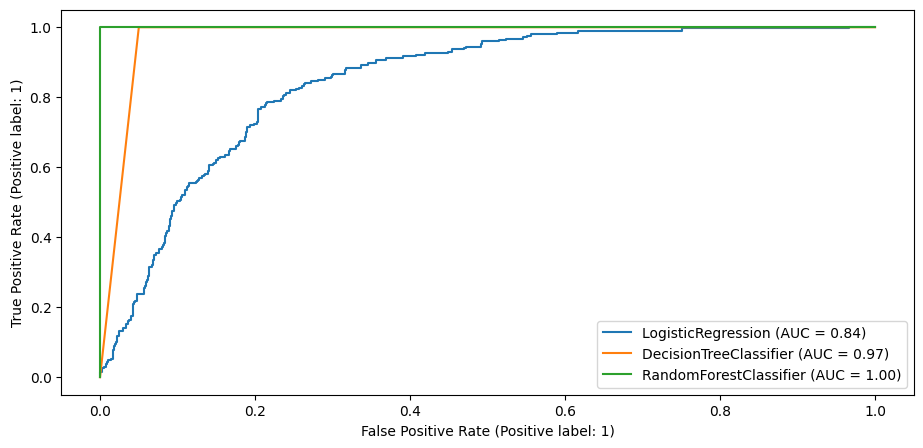

In [423]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, ax_roc = plt.subplots(1, 1, figsize=(11, 5))

RocCurveDisplay.from_estimator(m0,X_test,y_test, ax=ax_roc)
RocCurveDisplay.from_estimator(m1,X_test,y_test, ax=ax_roc)
RocCurveDisplay.from_estimator(m2,X_test,y_test, ax=ax_roc)

## Not overfitted

In [424]:
y0 = m0.predict(X_train)
y1 = m1.predict(X_train)
y2 = m2.predict(X_train)

In [425]:
accuracy_score(y_train,y0),accuracy_score(y_train,y1),accuracy_score(y_train,y2)

(0.7774823873454739, 1.0, 1.0)

## Hyperparameter Tuining

In [426]:
from sklearn.model_selection import GridSearchCV

In [427]:
len(X_train.columns)

14

In [319]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
decision_params = [{'criterion':['gini','entropy','log_loss'], 'max_depth': list(range(10, 15)), 'max_features': list(range(1,14))}]

In [320]:
d_clf = GridSearchCV(m1, decision_params, cv = 10, scoring='recall')
r_clf = GridSearchCV(m2, param_grid=param_grid, cv = 5, scoring='recall')

In [313]:
d_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='recall')

In [314]:
d_clf.best_params_

{'criterion': 'gini', 'max_depth': 12, 'max_features': 11}

In [315]:
dm = DecisionTreeClassifier(criterion='gini', max_depth=12, max_features=11)

In [316]:
dm.fit(X_train,y_train)
ydm = dm.predict(X_test)
accuracy_score(y_test,ydm)

0.9346092503987241

In [327]:
r_clf.fit(X_train,y_train)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 638, in _validate_params
    vali

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='recall')

In [428]:
rfc = RandomForestClassifier(criterion='gini', max_depth=16, max_features='log2', n_estimators= 200)
rfc.fit(X_train,y_train)
y_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_rfc),recall_score(y_test,y_rfc)

(0.9904306220095693, 1.0)

In [429]:
pickle.dump(rfc,open("model.pkl", "wb"))

In [328]:
r_clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [331]:
rfc = RandomForestClassifier(criterion='gini', max_depth=16, max_features='log2', n_estimators= 200)
rfc.fit(X_train,y_train)
y_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_rfc)

0.9909622541201488

### Fucntion to check the prediction

In [373]:
l={'gender':'Male',
   'age':75,
   'hypertension': 1,
   'heart_disease': 0,
   'ever_married': 'Yes',
   'work_type':'Private',
   'Residence_type':'Urban',
   'avg_glucose_level':200.59,
   'bmi':29.0,
   'smoking_status':'smokes'}

In [374]:
def pred(a):
    input_df = pd.DataFrame([a])
    input_df[encoded_cols] = encoder.transform(input_df[cat_cols])
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    input_df.drop(columns=cat_cols,axis=1,inplace=True)
    y_pred = rfc.predict(input_df)
    return y_pred

In [375]:
pred(l)

array([1], dtype=int64)

## Conclusion

1.<b>Identification of Critical Factors:</b> The dataset analysis highlights several significant factors associated with brain stroke occurrences, such as age, hypertension, heart disease, BMI, average glucose level, and smoking status. These attributes exhibit notable variations among individuals experiencing strokes compared to those without strokes.

2.<b>Gender and Marital Status Impact:</b> While gender and marital status (ever married) show correlations, their direct influence on stroke occurrences requires further investigation. Females or married individuals might show different susceptibilities to strokes, but deeper analysis is necessary to establish a causal relationship.

3.<b>Predictive Potential:</b> Initial exploration suggests potential predictive capabilities based on the dataset attributes. Models using this data may be able to forecast stroke risk, offering valuable insights for preventive healthcare measures.

4.<b>Need for Comprehensive Analysis:</b> The dataset provides a foundational understanding of stroke-related factors. However, a more comprehensive analysis involving additional data, including lifestyle habits, genetic predispositions, and broader demographic insights, could enhance the predictive power of the models.

5.<b>Potential Clinical Applications:</b> The findings from this dataset could contribute to improved healthcare strategies. Identifying high-risk individuals through predictive models might enable early interventions and targeted preventive measures to reduce the incidence of strokes.